## Import libs

In [1]:
import numpy as np
print("numpy version: {}".format(np.__version__))
import pandas as pd 
print("pandas version: {}".format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))
import scipy as sp
print("scipy version: {}".format(sp.__version__))
import sklearn as sl
print("scikit-learn: {}".format(sl.__version__))
import seaborn as sns
print("seaborn: {}".format(sns.__version__))
import statsmodels as sm
print("statsmodels: {}".format(sm.__version__))

numpy version: 1.17.4
pandas version: 0.25.3
matplotlib version: 3.1.2
scipy version: 1.3.3
scikit-learn: 0.21.3
seaborn: 0.9.0
statsmodels: 0.10.2


In [2]:
import os

In [3]:
data_path = '/home/vlad/.data/house_price'

In [4]:
ls /home/vlad/.data/house_price/

data_description.txt                             test.csv*
house-prices-advanced-regression-techniques.zip  train.csv*
sample_submission.csv


In [5]:
df_test = pd.read_csv(data_path + '/test.csv')
df_train = pd.read_csv(data_path + '/train.csv')

In [6]:
file = open(data_path + '/data_description.txt', 'r')

In [7]:
!chmod +rw /home/vlad/.data/house_price/data_description.txt

In [8]:
descripiton = file.read()

In [9]:
descripiton

"MSSubClass: Identifies the type of dwelling involved in the sale.\t\n\n        20\t1-STORY 1946 & NEWER ALL STYLES\n        30\t1-STORY 1945 & OLDER\n        40\t1-STORY W/FINISHED ATTIC ALL AGES\n        45\t1-1/2 STORY - UNFINISHED ALL AGES\n        50\t1-1/2 STORY FINISHED ALL AGES\n        60\t2-STORY 1946 & NEWER\n        70\t2-STORY 1945 & OLDER\n        75\t2-1/2 STORY ALL AGES\n        80\tSPLIT OR MULTI-LEVEL\n        85\tSPLIT FOYER\n        90\tDUPLEX - ALL STYLES AND AGES\n       120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER\n       150\t1-1/2 STORY PUD - ALL AGES\n       160\t2-STORY PUD - 1946 & NEWER\n       180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER\n       190\t2 FAMILY CONVERSION - ALL STYLES AND AGES\n\nMSZoning: Identifies the general zoning classification of the sale.\n\t\t\n       A\tAgriculture\n       C\tCommercial\n       FV\tFloating Village Residential\n       I\tIndustrial\n       RH\tResidential High Density\n       RL\tResidential Low Densi

In [43]:
os.read?

In [6]:
target_variable = df_train.SalePrice

In [7]:
#df_train.drop(columns=['SalePrice'], axis=1, inplace=True)

In [8]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

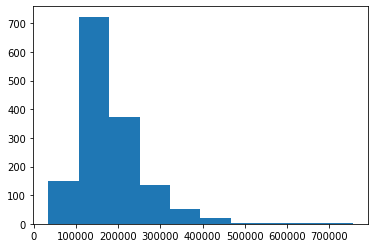

In [10]:
plt.hist(df_train.SalePrice)

In [11]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [12]:
print("Skew: {}\nKurtosis: {}".format(df_train.SalePrice.skew(), df_train.SalePrice.kurt()))

Skew: 1.8828757597682129
Kurtosis: 6.536281860064529


### Log of target variable

In [13]:
df_train.SalePrice = np.log(df_train.SalePrice)

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

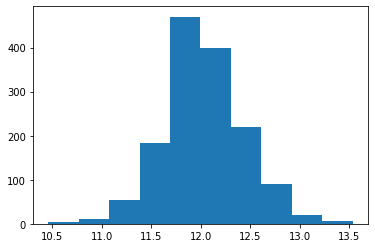

In [14]:
plt.hist(df_train.SalePrice)

In [15]:
print("Skew: {}\nKurtosis: {}".format(df_train.SalePrice.skew(), df_train.SalePrice.kurt()))

Skew: 0.12133506220520406
Kurtosis: 0.8095319958036296


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Drop most missing variables

In [17]:
missing_percentage(df_train)[missing_percentage(df_train)['Total'] != 0]

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [18]:
missing_percentage(df_test)[missing_percentage(df_test)['Total'] != 0]

,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageCond,78,5.35
GarageQual,78,5.35
GarageYrBlt,78,5.35
GarageFinish,78,5.35


In [19]:
train_columns_to_drop = missing_percentage(df_train)[missing_percentage(df_train)['Percent'] > 10].index

In [20]:
test_columns_to_drop = missing_percentage(df_test)[missing_percentage(df_test)['Percent'] > 10].index

In [21]:
train_columns_to_drop, test_columns_to_drop

(Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
        'LotFrontage'],
       dtype='object'),
 Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
        'LotFrontage'],
       dtype='object'))

In [22]:
train_columns_to_drop == test_columns_to_drop

array([ True,  True,  True,  True,  True,  True])

In [23]:
for dataframe in [df_train, df_test]:
    dataframe.drop(columns=train_columns_to_drop, inplace=True)

In [24]:
missing_percentage(df_train)[missing_percentage(df_train)['Percent'] >= 10]

,Total,Percent


In [25]:
missing_percentage(df_test)[missing_percentage(df_test)['Percent'] >= 10]

,Total,Percent


In [26]:
df_train.shape, df_test.shape

((1460, 75), (1459, 74))

In [27]:
df_train.MSSubClass.describe()

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

  MSSubClass

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

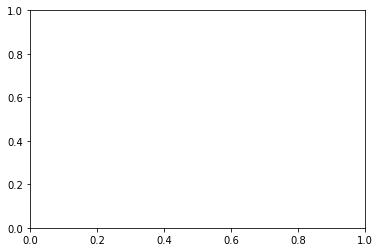

In [33]:
plt.(df_train.MSSubClass, df_train.SalePrice)
plt.title("MSSubClass vs SalePrice")

In [30]:
plt.bar?